# OPIM 5894 Lecture 8. Mathematical Statistics
Jing Peng <br>
UConn School of Business <br>
October 19, 2017 <br>

In [17]:
import numpy as np
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
# use the code below to make sure plot is shown in Notebook
%matplotlib inline 

# Bias of Estimator

In [26]:
nsim = 10000 # number of simulations
n = 10 # number of obs in one sample
var = [np.random.normal(loc=0, scale=1, size=10).var() for i in range(nsim)]
np.mean(var)

0.9025486687239862

In [20]:
var[:20]

[0.4012718008043521,
 0.56214318981517308,
 0.62383880131479985,
 0.44688992142492906,
 0.78129494641250186,
 1.3638800143841348,
 0.3803782055862644,
 0.5970577482751831,
 1.1265690796152235,
 0.88223778372778328,
 0.5172531491496084,
 1.0783459441919585,
 1.0971965094647065,
 0.59743897550214187,
 0.87719755774192498,
 0.5474815058877166,
 0.054250718997689004,
 0.47895577536672107,
 1.4377735093663719,
 1.552071751926511]

In [27]:
np.mean(var)*n/(n-1)

1.0028318541377625

In [28]:
var = [np.random.normal(loc=0, scale=1, size=10).var(ddof=1) for i in range(nsim)]
np.mean(var)

1.0072972789956143

# Comparison of Two Estimators

In [48]:
nsim = 1 # number of simulations
n = 100 # sample size
theta1 = [None] * nsim
theta2 = [None] * nsim
for i in range(nsim):
    x = np.random.normal(loc=0, scale=1, size=10)
    # estimator one use the first sample, estimator two use the mean of the sample
    theta1[i] = x[0]
    theta2[i]= np.mean(x)
print('theta1: ', np.mean(theta1), ", theta2: ", np.mean(theta2))
print('Variance of theta1: ', np.var(theta1), ", variance of theta2: ", np.var(theta2))

theta1:  -1.33590081828 , theta2:  -0.322899611879
Variance of theta1:  0.0 , variance of theta2:  0.0


In [50]:
theta1,theta2

([-1.3359008182814773], [-0.32289961187918353])

[0.027967800261874287]

# Illustration of Central Limit Theorem

In [ ]:
np.random.binomial(n=1,p=0.5,size=n_var)

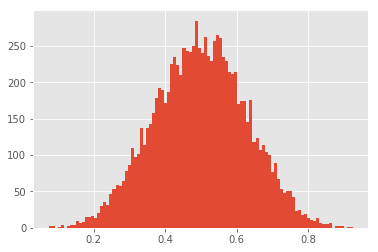

In [64]:
# When n_var=1, y is the same as the original distribution
nsim = 10000
n_var = 5
y = []
for i in range(nsim):
#     xi = np.random.binomial(n=1,p=0.8,size=n_var)
    xi = np.random.uniform(low=0, high=1, size=n_var)
#     xi = np.random.poisson(lam=1, size=n_var)
#     xi = np.random.exponential(scale=1, size=n_var)
    yi = np.mean(xi)
    y.append(yi)
    
plt.hist(np.array(y), bins=100)
plt.show()

In [ ]:
# An alternative way to show asymptoic properties of binomial
plt.hist(np.random.binomial(n=100,p=0.8,size=10000), bins=100)
plt.show()

# Interval Estimator

## Assuming Variance is Known

In [72]:
nsim = 10000 # number of simulations
n = 10 # number of obs in one sample
mu = 100
is_covered = [None] * nsim
for i in range(nsim):
    x = np.random.normal(loc=mu, scale=1, size=10)
    m = np.mean(x)
    lci = m - 1.96/np.sqrt(n)
    uci = m + 1.96/np.sqrt(n)
    is_covered[i] = lci<=mu<=uci
np.mean(is_covered)

0.95350000000000001

In [73]:
scipy.stats.norm.ppf(0.975)

1.959963984540054

## Variance is Unknown

In [ ]:
scipy.stats.t(df=n-1).ppf(0.975)

In [15]:
nsim = 10000 # number of simulations
n = 10 # number of obs in one sample
mu = 0
thd = 1.96
is_covered = [None] * nsim
for i in range(nsim):
    x = np.random.normal(loc=mu, scale=1, size=10)
    m = np.mean(x)
    s = np.var(x, ddof=1)
    # construct the t-test statistics
    T = np.sqrt(n) * m/np.sqrt(s)
    is_covered[i] = -thd<=T<=thd
np.mean(is_covered)

0.9163

In [16]:
scipy.stats.t(df=n-1).cdf(1.96) - scipy.stats.t(df=n-1).cdf(-1.96)

0.91835559453958338